# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# 2. Collect and load data

In [2]:
df2 = pd.read_csv("C:/Users/Shivalik Ghosh/Downloads/bigcity+(3).csv")
df2.head()

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


In [3]:
df = df2.rename({'Unnamed: 0' : 'City', 'u': '1920', 'x': '1930'}, axis=1)
df.head(2)

,City,1920,1930
0,1,138,143
1,2,93,104


# 3. Explore numeric variables - five number summary

In [68]:
df_num = df.select_dtypes(include = np.number)
df_num.head(5)

,City,1920,1930
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


# 3a. Visualize numeric variables in boxplot and histograms
# 3b. Measure spread – variance and standard deviation

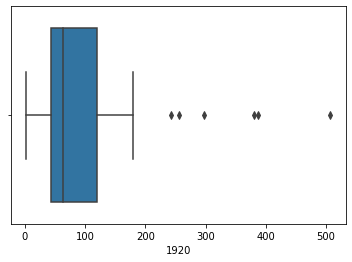

In [5]:
sns.boxplot(df['1920'])
plt.show()

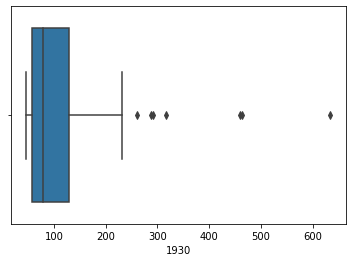

In [6]:
sns.boxplot(df['1930'])
plt.show()

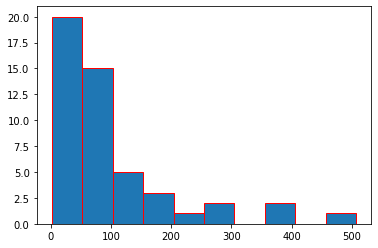

In [7]:
plt.hist(df['1920'], edgecolor = 'r')
plt.show()

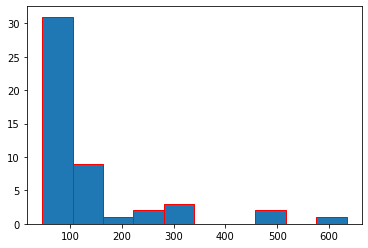

In [8]:
plt.hist(df['1930'], edgecolor = 'r')
plt.show()

In [9]:
df['1920'].std()

104.40506054146351

In [10]:
df['1920'].var()

10900.416666666662

In [11]:
df['1930'].std()

123.12121053252034

In [12]:
df['1930'].var()

15158.832482993197

# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

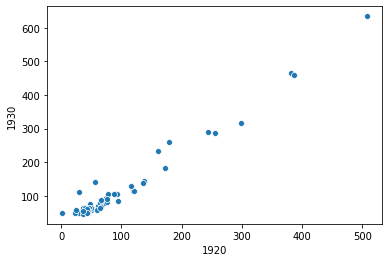

In [13]:
sns.scatterplot(data = df, x = '1920', y = '1930')
plt.show()

# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [44]:
X = df['1920']
y = df['1930']

In [46]:
X.shape, y.shape

((49,), (49,))

# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [14]:
df.isnull().sum()

City    0
1920    0
1930    0
dtype: int64

There are no null values in the DataFrame

In [15]:
df1 = df[['1920','1930']]
df1.corr()

,1920,1930
1920,1.000000,0.981742
1930,0.981742,1.000000


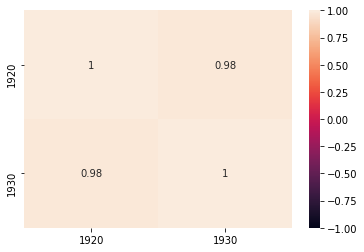

In [16]:
sns.heatmap(df1.corr(), annot = True, vmin = -1)
plt.show()

The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [17]:
from sklearn.model_selection import train_test_split 

In [21]:
import statsmodels.api as sm

In [22]:
X = df['1920']
y = df['1930']

Xc = sm.add_constant(X)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(Xc,y, test_size = 0.2, random_state = 42)

# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [24]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [25]:
print(regressor.intercept_)

8.345004524355474


In [26]:
print(regressor.coef_)

[0.         1.15542506]


# 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

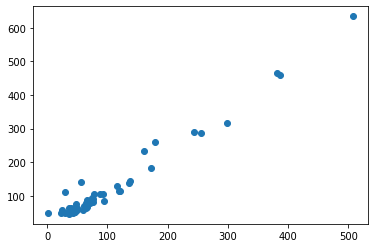

In [65]:
plt.scatter(data = df, x = '1920', y = '1930')
plt.show()

# 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [27]:
from sklearn.metrics import r2_score, mean_squared_error 

In [36]:
y_pred = regressor.predict(X_test)
y_pred

array([ 37.23063108,  58.0282822 , 194.36843953, 108.86698493,
        96.15730925, 165.48281298,  54.56200701,  82.2922085 ,
        49.94030676, 455.49450358])

In [52]:
y_pred1 = regressor.predict(X_train)
y_pred1

array([ 90.38018394,  63.80540751, 146.99601198,  43.00775639,
       215.16609065,  41.85233133,  82.2922085 ,  73.048808  ,
        58.0282822 ,  93.84645912,  10.65585465,  66.11625763,
        97.31273431,  85.75848369, 116.95496037, 167.7936631 ,
       142.37431173,  60.33913232,  51.09573182, 304.13382044,
        61.49455738,  84.60305863, 115.7995353 ,  77.67050825,
        78.82593332,  61.49455738, 207.07811521,  66.11625763,
        59.18370726,  52.25115689, 594.14551104, 448.5619532 ,
        49.94030676,  98.46815937,  34.91978095,  54.56200701,
       352.66167305, 289.11329463, 148.15143704])

In [43]:
print('rmse :', np.sqrt(mean_squared_error (y_test, y_pred)))

rmse : 16.9662569723268


In [41]:
print('r2_score : ', r2_score(y_test, y_pred))

r2_score :  0.980375436960151


# 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [53]:
print('r2_score : ', r2_score(y_test, y_pred))
print('r2_score : ', r2_score(y_train, y_pred1))

r2_score :  0.980375436960151
r2_score :  0.9596126269828564


In [54]:
print('rmse_test :', np.sqrt(mean_squared_error (y_test, y_pred)))
print('rmse_train :', np.sqrt(mean_squared_error (y_train, y_pred1)))

rmse_test : 16.9662569723268
rmse_train : 24.52389790641461
